In [3]:
#Linear Regression Model-predicts sales using these sales

In [74]:
# Import the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Ignore warnings.
import warnings
warnings.filterwarnings('ignore') 

In [14]:
# Read the data into a dataframe
data=pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
data.shape

(200, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


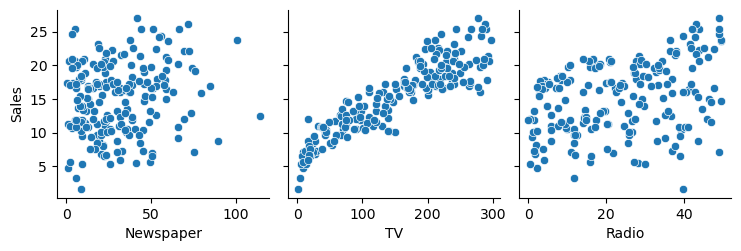

In [37]:
sns.pairplot(x_vars=['Newspaper','TV','Radio'],y_vars='Sales',data=data)


<AxesSubplot:>

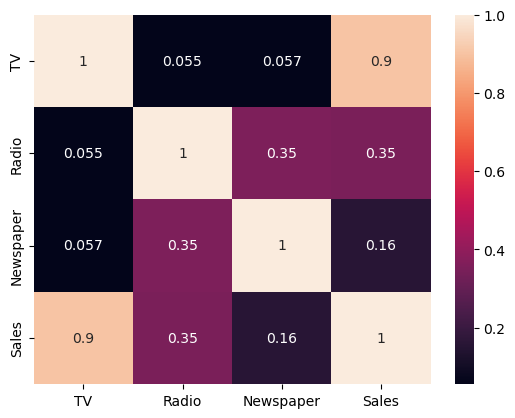

In [25]:
sns.heatmap(data.corr(),annot=True)

In [31]:
#create X and y
X=data['TV']
y=data['Sales']
#train-test-split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [32]:
X_train_lm

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [34]:
#training the model
X_train_sm=sm.add_constant(X_train_lm)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [40]:
#fitting the model
lr=sm.OLS(y_train_lm,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [42]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.52e-52
Time:                        08:52:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

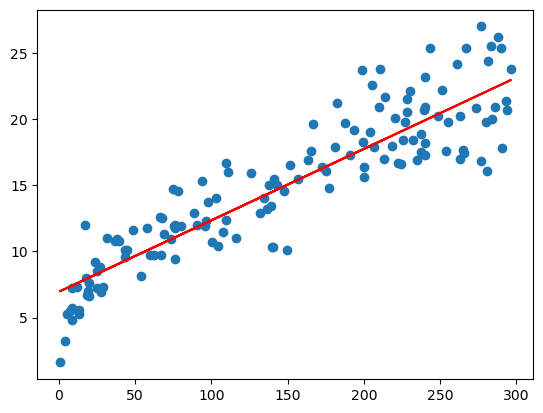

In [45]:
plt.scatter(X_train_lm,y_train_lm)
plt.plot(X_train_lm,6.948+0.054*X_train_lm,'r')
plt.show()

In [ ]:
#Residual analysis

In [60]:
ly_train_pred=lr_model.predict(X_train_sm)
ly_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [61]:
res=y_train_lm - y_train_pred


Text(0.5, 1.0, 'Residual plot')

<Figure size 640x480 with 0 Axes>

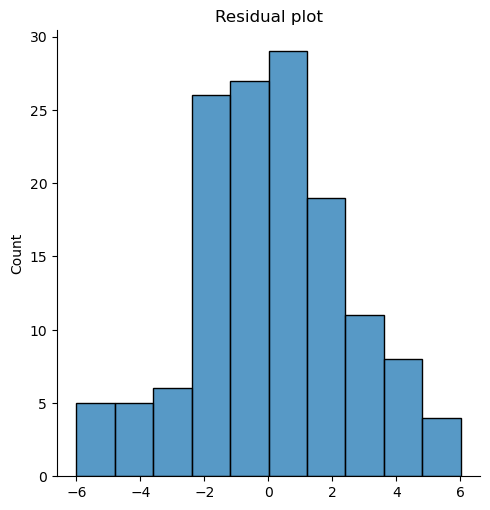

In [69]:
plt.figure()
sns.displot(res)
plt.title('Residual plot')

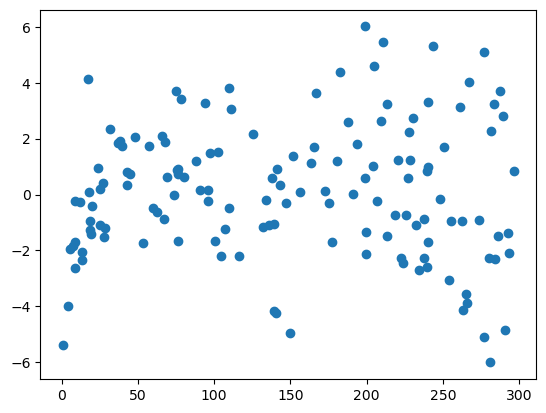

In [71]:
#look for patterns
plt.scatter(X_train_lm,res)
plt.show()

In [ ]:
#Predictions- Test data.

In [72]:
X_test_sm=sm.add_constant(X_test_lm)
ly_test_pred=lr_model.predict(X_test_sm)


In [77]:
r2_score(y_test_lm,ly_test_pred)

0.8130410078090679

In [79]:
#r2 on train
r2_score(y_train_lm,ly_train_pred)

0.8157933136480389

In [81]:
#mean squared error
mean_squared_error(y_test_lm,ly_test_pred)

3.666894746140687

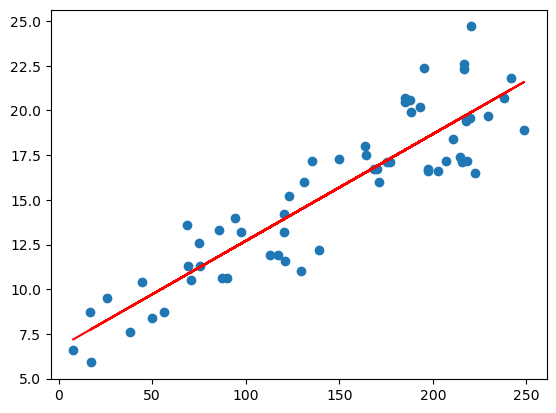

In [83]:
plt.scatter(X_test_lm,y_test_lm)
plt.plot(X_test_lm,ly_test_pred,'r')
plt.show()